In [1]:
from database.market import Market
from database.strategy import Strategy
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [3]:
market = Market()
strategy = Strategy("project_strategy")

In [4]:
strategy.connect()
trades = strategy.retrieve("trades")
strategy.disconnect()

In [7]:
t= trades.drop("_id",axis=1,errors="ignore")

In [8]:
t["seat"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [9]:
trades

,index,_id_x,date,close,high,low,open,volume,adjClose,adjHigh,...,weekly_delta,sell_date,sell_price,delta,score,d,wcty,wmty,value,seat
0,895170,6157ef5520b66d72116b1b1f,2018-01-02,186.94,188.980,186.900,188.520,925692,180.796989,182.769953,...,0.436568,2018-01-03,185.361886,0.025249,60,0,1,1,True,0
1,600902,6157eeed20b66d7211669ee1,2018-01-02,292.95,293.140,289.000,290.900,1463603,292.950000,293.140000,...,0.433957,2018-01-05,313.790000,0.071138,60,0,1,1,True,1
2,1087588,6157ef9c20b66d72116e0a42,2018-01-02,181.42,181.580,177.550,177.680,17694891,181.420000,181.580000,...,0.431635,2018-01-08,188.280000,0.037813,60,0,1,1,True,2
3,2678544,6157f1cb20b66d7211864b08,2018-01-02,15.03,15.060,14.430,14.590,7942299,15.030000,15.060000,...,0.258494,2018-01-10,15.060000,0.001996,60,0,1,1,True,3
4,2697845,6157f1d320b66d721186966d,2018-01-02,221.16,222.450,220.000,221.020,3276075,208.956877,210.175698,...,0.242970,2018-01-12,216.024147,0.033822,60,0,1,1,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152570,1191990,6157ef8720b66d72116d3ce9,2021-01-25,250.02,252.200,247.405,250.240,1071998,248.744503,250.913382,...,0.690183,2021-02-08,279.108803,0.122070,60,10,1,3,False,10
152571,2973009,6157f1a720b66d721184b70b,2021-03-04,621.44,668.450,600.000,655.800,64799898,621.440000,668.450000,...,0.764614,2021-03-11,699.600000,0.125772,60,10,1,3,False,3
152572,2344976,6157f0eb20b66d72117c655d,2021-03-04,450.26,459.960,448.160,454.970,789775,450.260000,459.960000,...,0.721527,2021-03-25,496.980000,0.103762,60,10,1,3,False,9
152573,497878,6157eeaf20b66d7211641010,2021-03-04,2219.35,2277.165,2163.400,2277.165,484102,2219.350000,2277.165000,...,0.699328,2021-04-09,2450.060000,0.103954,60,10,1,3,False,10


In [36]:
a = []
seats = 10
for number_of_training_weeks in tqdm(range(14,69,14)):
    for weekly_model_training_year in tqdm(range(1,6)):
        for weekly_category_training_year in tqdm(range(1,5)):
            for delta in tqdm(range(0,15,5)):
                d = delta/100
                for what in range(2):
                    value = what == 1 
                    for score in tqdm(range(60,100,10)):
                        try:
                            score_trades = t[(t["score"]==score) & 
                                             (t["d"]==d) & 
                                            (t["wcty"]==weekly_category_training_year) & 
                                             (t["wmty"]==weekly_model_training_year) &
                                            (t["tw"]==number_of_training_weeks) &
                                            (t["value"]==value)]
                            print(weekly_category_training_year,weekly_model_training_year,d,required,score_trades.index.size)
#                             cash = []
#                             for seat in range(seats):
#                                 initial = float(100 / seats)
#                                 seat_trades = score_trades[score_trades["seat"]==seat]
#                                 for delta in seat_trades["delta"]:
#                                     initial = initial * (1+delta)
#                                     cash.append(initial)
#                                 analysis = {}
#                                 analysis["score"] = score
#                                 analysis["trades"] = seat_trades.index.size
#                                 if seat_trades.index.size > 0:
#                                     analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
#                                     seat_trades["hpr"] = (seat_trades["sell_date"] - seat_trades["date"])
#                                     seat_trades["hpr"] =[x.days for x in seat_trades["hpr"]]
#                                     analysis["hpr"] = seat_trades["hpr"].mean()
#                                     analysis["seat"] = seat
#                                     analysis["d"] = d
#                                     analysis["wcty"] = weekly_category_training_year
#                                     analysis["wmty"] = weekly_model_training_year
#                                     analysis["tw"] = number_of_training_weeks
#                                     analysis["value"] = value
#                                     analysis["pv"] = initial
#                                     a.append(analysis)
                        except Exception as e:
                            print(str(e))
                            continue

  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 400.50it/s]


1 1 0.0 10 338
1 1 0.0 10 338
1 1 0.0 10 338
1 1 0.0 10 338






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


1 1 0.0 10 345
1 1 0.0 10 345
1 1 0.0 10 345
1 1 0.0 10 344






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]


1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.98it/s]


1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.34it/s]


2 1 0.0 10 342
2 1 0.0 10 342
2 1 0.0 10 335
2 1 0.0 10 337






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


2 1 0.0 10 334
2 1 0.0 10 334
2 1 0.0 10 334
2 1 0.0 10 336






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.35it/s]


2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]


2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.36it/s]

2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]


3 1 0.0 10 348
3 1 0.0 10 348
3 1 0.0 10 350
3 1 0.0 10 350






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.29it/s]


3 1 0.0 10 318
3 1 0.0 10 320
3 1 0.0 10 320
3 1 0.0 10 316






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]

3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]



  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]


4 1 0.0 10 343
4 1 0.0 10 343
4 1 0.0 10 350
4 1 0.0 10 348






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 1 0.0 10 357
4 1 0.0 10 359
4 1 0.0 10 359
4 1 0.0 10 358






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 1 0.1 10 0
4 1 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


4 1 0.1 10 0
4 1 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]

4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.24it/s]

 20%|███████████████████████████                                                                                                            | 1/5 [00:00<00:00,  4.04it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

1 2 0.0 10 355
1 2 0.0 10 355
1 2 0.0 10 355
1 2 0.0 10 355







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


1 2 0.0 10 328
1 2 0.0 10 328
1 2 0.0 10 334
1 2 0.0 10 331






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 2 0.05 10 0
1 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


1 2 0.05 10 0
1 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]

1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.30it/s]


2 2 0.0 10 339
2 2 0.0 10 339
2 2 0.0 10 338
2 2 0.0 10 337






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


2 2 0.0 10 346
2 2 0.0 10 346
2 2 0.0 10 344
2 2 0.0 10 337






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.05 10 0
2 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


2 2 0.05 10 0
2 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0
2 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.26it/s]

2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 2 0.0 10 347
3 2 0.0 10 347
3 2 0.0 10 357
3 2 0.0 10 350






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.32it/s]


3 2 0.0 10 327
3 2 0.0 10 327
3 2 0.0 10 327
3 2 0.0 10 337






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


3 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.34it/s]


3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]

3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]



  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


4 2 0.0 10 343
4 2 0.0 10 343
4 2 0.0 10 345
4 2 0.0 10 355






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


4 2 0.0 10 346
4 2 0.0 10 346
4 2 0.0 10 348
4 2 0.0 10 348






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]


4 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.89it/s]


4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.06it/s]

 40%|██████████████████████████████████████████████████████                                                                                 | 2/5 [00:00<00:00,  4.00it/s]

4 2 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.91it/s]

1 3 0.0 10 351
1 3 0.0 10 351
1 3 0.0 10 351
1 3 0.0 10 354







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.28it/s]


1 3 0.0 10 347
1 3 0.0 10 347
1 3 0.0 10 347
1 3 0.0 10 340






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]

1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.35it/s]


1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.32it/s]


2 3 0.0 10 369
2 3 0.0 10 369
2 3 0.0 10 369
2 3 0.0 10 371






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 3 0.0 10 333
2 3 0.0 10 333
2 3 0.0 10 333
2 3 0.0 10 332






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.05 10 0
2 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


2 3 0.05 10 0
2 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]


2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0
2 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.53it/s]

3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.98it/s]


3 3 0.0 10 355
3 3 0.0 10 355
3 3 0.0 10 357
3 3 0.0 10 361






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.0 10 333


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


3 3 0.0 10 333
3 3 0.0 10 333
3 3 0.0 10 341






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]

3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.1 10 0
3 3 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


3 3 0.1 10 0
3 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 3 0.0 10 347
4 3 0.0 10 347
4 3 0.0 10 348
4 3 0.0 10 353






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 3 0.0 10 352
4 3 0.0 10 352


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.32it/s]


4 3 0.0 10 352
4 3 0.0 10 341






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


4 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]

4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.32it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████                                                      | 3/5 [00:00<00:00,  4.02it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.92it/s]


1 4 0.0 10 356
1 4 0.0 10 356
1 4 0.0 10 356
1 4 0.0 10 352






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


1 4 0.0 10 332
1 4 0.0 10 332
1 4 0.0 10 353
1 4 0.0 10 353






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


1 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.1 10 0
1 4 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


1 4 0.1 10 0
1 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


2 4 0.0 10 357
2 4 0.0 10 357
2 4 0.0 10 354
2 4 0.0 10 354






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.0 10 339


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.42it/s]


2 4 0.0 10 339
2 4 0.0 10 347
2 4 0.0 10 347






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]

2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 363.53it/s]


2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0
2 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.37it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.26it/s]

4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.41it/s]


3 4 0.0 10 350
3 4 0.0 10 350
3 4 0.0 10 349
3 4 0.0 10 349






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


3 4 0.0 10 350
3 4 0.0 10 350
3 4 0.0 10 348
3 4 0.0 10 347






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.34it/s]


3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]

3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]



  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.28it/s]


4 4 0.0 10 351
4 4 0.0 10 351
4 4 0.0 10 350
4 4 0.0 10 351






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


4 4 0.0 10 332
4 4 0.0 10 332
4 4 0.0 10 332
4 4 0.0 10 331






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]

4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]


4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 4 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]

4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.06it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00,  4.01it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

1 5 0.0 10 266
1 5 0.0 10 266
1 5 0.0 10 266
1 5 0.0 10 271







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


1 5 0.0 10 280
1 5 0.0 10 280
1 5 0.0 10 280
1 5 0.0 10 281






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.05 10 0
1 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


1 5 0.05 10 0
1 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.34it/s]


2 5 0.0 10 263
2 5 0.0 10 263
2 5 0.0 10 263
2 5 0.0 10 261






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]


2 5 0.0 10 258
2 5 0.0 10 258
2 5 0.0 10 268
2 5 0.0 10 266






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


2 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.26it/s]

2 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.94it/s]


3 5 0.0 10 261
3 5 0.0 10 261
3 5 0.0 10 261
3 5 0.0 10 262






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


3 5 0.0 10 239
3 5 0.0 10 239
3 5 0.0 10 239
3 5 0.0 10 239






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 5 0.05 10 0
3 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 5 0.05 10 0
3 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]

3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]



  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 5 0.0 10 255
4 5 0.0 10 255
4 5 0.0 10 255
4 5 0.0 10 252






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.77it/s]


4 5 0.0 10 237
4 5 0.0 10 237
4 5 0.0 10 237
4 5 0.0 10 237






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.32it/s]


4 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.26it/s]

4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.13it/s]

  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                  

1 1 0.0 10 354
1 1 0.0 10 354
1 1 0.0 10 357


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.94it/s]


1 1 0.0 10 355






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


1 1 0.0 10 343
1 1 0.0 10 343
1 1 0.0 10 332
1 1 0.0 10 353






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


1 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 1 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]


1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]

2 1 0.0 10 333
2 1 0.0 10 339
2 1 0.0 10 339
2 1 0.0 10 327







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


2 1 0.0 10 323
2 1 0.0 10 325
2 1 0.0 10 324
2 1 0.0 10 327






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]

2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.98it/s]


2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 1 0.1 10 0
2 1 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.00it/s]

2 1 0.1 10 0
2 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 1 0.0 10 329
3 1 0.0 10 334
3 1 0.0 10 341
3 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


1 0.0 10 344






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 1 0.0 10 341
3 1 0.0 10 348
3 1 0.0 10 361
3 1 0.0 10 363






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]

3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.35it/s]


3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 1 0.1 10 0
3 1 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


3 1 0.1 10 0
3 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.42it/s]

4 1 0.0 10 333
4 1 0.0 10 333
4 1 0.0 10 328
4 1 0.0 10 337







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


4 1 0.0 10 345
4 1 0.0 10 342
4 1 0.0 10 342
4 1 0.0 10 348






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 1 0.05 10 0
4 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.29it/s]


4 1 0.05 10 0
4 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.19it/s]

 20%|███████████████████████████                                                                                                            | 1/5 [00:00<00:00,  4.03it/s]

4 1 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.91it/s]

1 2 0.0 10 363
1 2 0.0 10 363
1 2 0.0 10 369
1 2 0.0 10 347







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 2 0.0 10 346
1 2 0.0 10 346
1 2 0.0 10 347
1 2 0.0 10 355






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]

1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]

2 2 0.0 10 331
2 2 0.0 10 331
2 2 0.0 10 331
2 2 0.0 10 356







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.87it/s]


2 2 0.0 10 353
2 2 0.0 10 353
2 2 0.0 10 353
2 2 0.0 10 357






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 494.54it/s]

2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 495.25it/s]


2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.1 10 0
2 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.03it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 15.97it/s]

2 2 0.1 10 0
2 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.0 10 359
3 2 0.0 10 359
3 2 0.0 10 363


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


3 2 0.0 10 358






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


3 2 0.0 10 341
3 2 0.0 10 341
3 2 0.0 10 343
3 2 0.0 10 348






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]

3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.1 10 0
3 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


3 2 0.1 10 0
3 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]

4 2 0.0 10 343
4 2 0.0 10 343
4 2 0.0 10 346
4 2 0.0 10 348







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


4 2 0.0 10 344
4 2 0.0 10 346
4 2 0.0 10 337
4 2 0.0 10 343






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.35it/s]


4 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.35it/s]

4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.24it/s]

 40%|██████████████████████████████████████████████████████                                                                                 | 2/5 [00:00<00:00,  4.02it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                  

1 3 0.0 10 336
1 3 0.0 10 338
1 3 0.0 10 335
1 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.92it/s]


3 0.0 10 338






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


1 3 0.0 10 333
1 3 0.0 10 330
1 3 0.0 10 326
1 3 0.0 10 348






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 3 0.05 10 0
1 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


1 3 0.05 10 0
1 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.26it/s]

1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]



  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.1 10 0
2 3 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


2 3 0.1 10 0
2 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.66it/s]

2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.0 10 0
3 3 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 3 0.0 10 0
3 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.98it/s]


3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]

3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0







100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]

4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 3 0.05 10 0
4 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 3 0.05 10 0
4 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.24it/s]


4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.66it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████                                                      | 3/5 [00:00<00:00,  4.08it/s]

4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


1 4 0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.20it/s]

1 4 0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.05 10 0
1 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.32it/s]


1 4 0.05 10 0
1 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.0 10 0
2 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


2 4 0.0 10 0
2 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 4 0.0 10 0
2 4 0.0 10 0
2 4 0.0 10 0
2 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.05 10 0
2 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


2 4 0.05 10 0
2 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.00it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.28it/s]

2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.0 10 0
3 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


3 4 0.0 10 0
3 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]

3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.1 10 0
3 4 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


3 4 0.1 10 0
3 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]

4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 4 0.05 10 0
4 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]


4 4 0.05 10 0
4 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.18it/s]


4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]

4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.54it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00,  4.09it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.35it/s]


1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.05 10 0
1 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.32it/s]


1 5 0.05 10 0
1 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.35it/s]


1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]


2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


2 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]


2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.1 10 0
2 5 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


2 5 0.1 10 0
2 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.38it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.13it/s]

2 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]

3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]



  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]


4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]


4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 5 0.1 10 0
4 5 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 5 0.1 10 0
4 5 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.36it/s]

4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.26it/s]

  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 1 0.0 10 0
1 1 0.0 10 0
1 1 0.0 10 0
1 1 0.0 10 0

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.93it/s]






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


1 1 0.0 10 0
1 1 0.0 10 0
1 1 0.0 10 0
1 1 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 1 0.05 10 0
1 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


1 1 0.05 10 0
1 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.30it/s]


1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]


1 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 1 0.0 10 0
2 1 0.0 10 0
2 1 0.0 10 0
2 1 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.98it/s]


2 1 0.0 10 0
2 1 0.0 10 0
2 1 0.0 10 0
2 1 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.78it/s]


2 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]

2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.26it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


3 1 0.0 10 0
3 1 0.0 10 0
3 1 0.0 10 0
3 1 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 1 0.0 10 0
3 1 0.0 10 0
3 1 0.0 10 0
3 1 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.98it/s]


3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 1 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 1 0.0 10 0
4 1 0.0 10 0
4 1 0.0 10 0
4 1 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 1 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 1 0.0 10 0
4 1 0.0 10 0
4 1 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 1 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.32it/s]

 20%|███████████████████████████                                                                                                            | 1/5 [00:00<00:00,  4.06it/s]

4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.88it/s]


1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]

1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 2 0.1 10 0
1 2 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.99it/s]


1 2 0.1 10 0
1 2 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.44it/s]


2 2 0.0 10 0
2 2 0.0 10 0
2 2 0.0 10 0
2 2 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.0 10 0
2 2 0.0 10 0
2 2 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.99it/s]


2 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.95it/s]

2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.86it/s]


3 2 0.0 10 0
3 2 0.0 10 0
3 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


3 2 0.0 10 0
3 2 0.0 10 0
3 2 0.0 10 0
3 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.29it/s]


3 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.0 10 0
4 2 0.0 10 0
4 2 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


4 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 2 0.0 10 0
4 2 0.0 10 0
4 2 0.0 10 0
4 2 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.87it/s]

 40%|██████████████████████████████████████████████████████                                                                                 | 2/5 [00:00<00:00,  4.13it/s]

4 2 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 3 0.0 10 0
1 3 0.0 10 0
1 3 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.88it/s]


1 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.26it/s]


1 3 0.0 10 0
1 3 0.0 10 0
1 3 0.0 10 0
1 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.24it/s]

1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 3 0.1 10 0
1 3 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 3 0.1 10 0
1 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.05 10 0
2 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.31it/s]


2 3 0.05 10 0
2 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.1 10 0
2 3 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.26it/s]

2 3 0.1 10 0
2 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0
3 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.34it/s]


3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.05 10 0
3 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.78it/s]


3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


3 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 3 0.05 10 0
4 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


4 3 0.05 10 0
4 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 3 0.1 10 0
4 3 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.38it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.06it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████                                                      | 3/5 [00:00<00:00,  4.06it/s]

4 3 0.1 10 0
4 3 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.0 10 0
1 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.92it/s]


1 4 0.0 10 0
1 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


1 4 0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


1 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.38it/s]


1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.0 10 0
2 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.30it/s]


2 4 0.0 10 0
2 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


2 4 0.0 10 0
2 4 0.0 10 0
2 4 0.0 10 0
2 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.83it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.13it/s]

2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.29it/s]


3 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.05 10 0
3 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 4 0.05 10 0
3 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.39it/s]


3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


3 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]


4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 4 0.05 10 0
4 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


4 4 0.05 10 0
4 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.18it/s]


4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 4 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.24it/s]


4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]

4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.39it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00,  4.06it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.05 10 0
1 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.39it/s]


1 5 0.05 10 0
1 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.34it/s]


1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.17it/s]


1 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]


2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.05 10 0
2 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.69it/s]


2 5 0.05 10 0
2 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]


2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.26it/s]

2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.39it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.18it/s]


3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.98it/s]


3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.22it/s]


3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 5 0.1 10 0
3 5 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.32it/s]


3 5 0.1 10 0
3 5 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.77it/s]


4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 5 0.0 10 0
4 5 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


4 5 0.0 10 0
4 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.29it/s]


4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.43it/s]

4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0







100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.53it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:03<00:01,  1.24s/it]

4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0



  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.90it/s]


1 1 0.0 10 0
1 1 0.0 10 0
1 1 0.0 10 0
1 1 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 1 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


1 1 0.0 10 0
1 1 0.0 10 0
1 1 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.74it/s]

1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.29it/s]


1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0
1 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 1 0.1 10 0
1 1 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 1 0.1 10 0
1 1 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.38it/s]

1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0
1 1 0.1 10 0






  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.31it/s]


2 1 0.0 10 0
2 1 0.0 10 0
2 1 0.0 10 0
2 1 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 1 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]


2 1 0.0 10 0
2 1 0.0 10 0
2 1 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.35it/s]


2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0
2 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


2 1 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 53.56it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.53it/s]

2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0
2 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


3 1 0.0 10 0
3 1 0.0 10 0
3 1 0.0 10 0
3 1 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 1 0.0 10 0
3 1 0.0 10 0
3 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


1 0.0 10 0
3 1 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]


3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 1 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.36it/s]


3 1 0.05 10 0
3 1 0.05 10 0
3 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]

3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0







100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0
3 1 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 1 0.0 10 0
4 1 0.0 10 0
4 1 0.0 10 0
4 1 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]

4 1 0.0 10 0
4 1 0.0 10 0
4 1 0.0 10 0
4 1 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 1 0.05 10 0
4 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 0.05 10 0
4 1 0.05 10 0
4 1 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.39it/s]

 20%|███████████████████████████                                                                                                            | 1/5 [00:00<00:00,  4.08it/s]

4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0
4 1 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.29it/s]


1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]

1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0
1 2 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0
1 2 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 2 0.05 10 0
1 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


1 2 0.05 10 0
1 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0
1 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.0 10 0
2 2 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.41it/s]


2 2 0.0 10 0
2 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.31it/s]


2 2 0.0 10 0
2 2 0.0 10 0
2 2 0.0 10 0
2 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.28it/s]


2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.35it/s]

2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0
2 2 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0
2 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 2 0.1 10 0
2 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.80it/s]

2 2 0.1 10 0
2 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.0 10 0
3 2 0.0 10 0
3 2 0.0 10 0
3 2 0.0

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


3 2 0.0 10 0
3 2 0.0 10 0
3 2 0.0 10 0
3 2 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.05 10 0
3 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


3 2 0.05 10 0
3 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0
3 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 2 0.1 10 0
3 2 0.1 10 0
3 2 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


3 2 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.39it/s]


4 2 0.0 10 0
4 2 0.0 10 0
4 2 0.0 10 0
4 2 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 2 0.0 10 0
4 2 0.0 10 0
4 2 0.0 10 0
4 2 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 2 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0
4 2 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 2 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0
4 2 0.1 10 0




100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.66it/s]

 40%|██████████████████████████████████████████████████████                                                                                 | 2/5 [00:00<00:00,  4.11it/s]

  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


1 3 0.0 10 0
1 3 0.0 10 0
1 3 0.0 10 0
1 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


1 3 0.0 10 0
1 3 0.0 10 0
1 3 0.0 10 0
1 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


1 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.12it/s]


1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0
1 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]

1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0
1 3 0.1 10 0






  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0
2 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.0 10 0
2 3 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.35it/s]


2 3 0.0 10 0
2 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.81it/s]

2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0
2 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.80it/s]


2 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.71it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.95it/s]

2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0
2 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]


3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.0 10 0
3 3 0.0 10 0
3 3 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


3 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.93it/s]


3 3 0.05 10 0
3 3 0.05 10 0
3 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


3 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0
3 3 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.83it/s]


4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]

4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0
4 3 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 3 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


4 3 0.05 10 0
4 3 0.05 10 0
4 3 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.53it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████                                                      | 3/5 [00:00<00:00,  4.10it/s]

4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0
4 3 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.90it/s]


1 4 0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.0 10 0
1 4 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


0.0 10 0
1 4 0.0 10 0
1 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0
1 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 4 0.1 10 0
1 4 0.1 10 0
1 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 0.1 10 0
1 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0
1 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


2 4 0.0 10 0
2 4 0.0 10 0
2 4 0.0 10 0
2 4 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.0 10 0
2 4 0.0 10 0
2 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 363.61it/s]


2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.35it/s]


2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0
2 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


2 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 48.38it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.00it/s]

2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0
2 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.0 10 0
3 4 0.0 10 0
3 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.31it/s]


3 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.95it/s]


3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


3 4 0.05 10 0
3 4 0.05 10 0
3 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.24it/s]

3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0







100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0
3 4 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 4 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.35it/s]


4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0
4 4 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.26it/s]


4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0
4 4 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 4 0.05 10 0
4 4 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 4 0.05 10 0
4 4 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.26it/s]


4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 52.62it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.32it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00,  4.08it/s]

4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0
4 4 0.1 10 0




  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.86it/s]


1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.87it/s]


1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0
1 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]


1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0
1 5 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

1 5 0.05 10 0
1 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.37it/s]


1 5 0.05 10 0
1 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.89it/s]


1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0






100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0
1 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.0 10 0
2 5 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.93it/s]


2 5 0.0 10 0
2 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.86it/s]


2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0
2 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.05 10 0
2 5 0.05 10 0
2 5 0.05 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


2 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.99it/s]


2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

2 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 49.99it/s]


 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00, 16.39it/s]

2 5 0.1 10 0
2 5 0.1 10 0
2 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 5 0.0 10 0
3 5 0.0 10 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]


3 5 0.0 10 0
3 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.92it/s]


3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0
3 5 0.0 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.84it/s]


3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.33it/s]

3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0
3 5 0.05 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.29it/s]


3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0
3 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

3 5 0.1 10 0
3 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


3 5 0.1 10 0
3 5 0.1 10 0





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 444.38it/s]

4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0







100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.18it/s]


4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0
4 5 0.0 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 5 0.05 10 0
4 5 0.05 10 0
4 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.99it/s]


5 0.05 10 0
4 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 571.29it/s]


4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0
4 5 0.05 10 0






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.90it/s]


4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0






  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

4 5 0.1 10 0
4 5 0.1 10 0
4 5 0.1 10 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 50.84it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.23s/it]

4 5 0.1 10 0


In [35]:
a = []
seats = 10
for quarterly_category_training_year in tqdm(range(1,5)):
    for quarterly_model_training_year in tqdm(range(1,6)):
        for required in tqdm(range(0,15,5)):
            d = float(required/100)
            for what in range(2):
                value = what == 1 
                for score in tqdm(range(60,100,10)):
                    try:
                        score_trades = t[(t["score"]==score) & 
                                         (t["d"]==required) & 
                                        (t["qcty"]==quarterly_category_training_year) & 
                                         (t["qmty"]==quarterly_model_training_year) &
                                        (t["value"]==value)]
                        print(quarterly_category_training_year,quarterly_model_training_year,d,required,score_trades.index.size)
#                         cash = []
#                         for seat in range(seats):
#                             initial = float(100 / seats)
#                             seat_trades = score_trades[score_trades["seat"]==seat]
#                             for delta in seat_trades["delta"]:
#                                 initial = initial * (1+delta)
#                                 cash.append(initial)
#                             analysis = {}
#                             analysis["score"] = score
#                             analysis["trades"] = seat_trades.index.size
#                             if seat_trades.index.size > 0:
#                                 analysis["winrate"] = seat_trades[score_trades["delta"] > 0].index.size / seat_trades.index.size
#                                 seat_trades["hpr"] = (seat_trades["sell_date"] - seat_trades["date"])
#                                 seat_trades["hpr"] =[x.days for x in seat_trades["hpr"]]
#                                 analysis["hpr"] = seat_trades["hpr"].mean()
#                                 analysis["seat"] = seat
#                                 analysis["d"] = required
#                                 analysis["qcty"] = quarterly_category_training_year
#                                 analysis["qmty"] = quarterly_model_training_year
#                                 analysis["value"] = value
#                                 analysis["pv"] = initial
#                                 a.append(analysis)
                    except Exception as e:
                        print(str(e))
                        continue

  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.69it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.27it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.97it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.32it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.96it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.69it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.60it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1331.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.48it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.98it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.48it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.35it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00, 37.73it/s]

'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.16it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.37it/s]


'qcty'
'qcty'
'qcty'
'qcty'





 25%|█████████████████████████████████▊                                                                                                     | 1/4 [00:00<00:00,  7.41it/s]

'qcty'
'qcty'
'qcty'
'qcty'



  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.71it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.58it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.36it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 107.12it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.32it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]

'qcty'
'qcty'
'qcty'
'qcty'






100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1997.53it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.97it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00, 36.36it/s]

'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.58it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





 50%|███████████████████████████████████████████████████████████████████▌                                                                   | 2/4 [00:00<00:00,  7.25it/s]

'qcty'
'qcty'
'qcty'
'qcty'



  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.37it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.67it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.14it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.97it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

'qcty'
'qcty'
'qcty'


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.48it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.79it/s]


'qcty'
'qcty'
'qcty'
'qcty'





  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

'qcty'
'qcty'


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 124.97it/s]


'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2000.38it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1190.63it/s]

'qcty'
'qcty'
'qcty'
'qcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.37it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.27it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.36it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1997.76it/s]


'qcty'
'qcty'
'qcty'
'qcty'





  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

'qcty'
'qcty'
'qcty'


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.43it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.97it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00, 37.73it/s]

'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.69it/s]

'qcty'
'qcty'
'qcty'
'qcty'






100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.48it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.48it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'qcty'
'qcty'
'qcty'
'qcty'





  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

'qcty'


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.43it/s]


'qcty'
'qcty'
'qcty'





 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 3/4 [00:00<00:00,  7.32it/s]

'qcty'
'qcty'
'qcty'
'qcty'



  0%|                                                                                                                                               | 0/5 [00:00<?, ?it/s]

  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'qcty'
'qcty'
'qcty'
'qcty'





  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

'qcty'


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.89it/s]


'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.58it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.36it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.91it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.32it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.97it/s]

'qcty'
'qcty'
'qcty'
'qcty'





  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.01it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.37it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.42it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1999.19it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 119.97it/s]


'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

'qcty'


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 999.54it/s]


'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.11it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.69it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.36it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 4/5 [00:00<00:00, 36.36it/s]

'qcty'
'qcty'
'qcty'
'qcty'




  0%|                                                                                                                                               | 0/3 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.90it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.95it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1998.72it/s]


'qcty'
'qcty'
'qcty'
'qcty'





100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1332.37it/s]


'qcty'
'qcty'
'qcty'
'qcty'





  0%|                                                                                                                                               | 0/4 [00:00<?, ?it/s]

'qcty'
'qcty'
'qcty'


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1333.22it/s]


'qcty'





100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.24it/s]

'qcty'
'qcty'
'qcty'
'qcty'


In [33]:
required

NameError: name 'required' is not defined

In [11]:
final = pd.DataFrame(a)

In [12]:
final

,score,trades,winrate,hpr,seat,d,wcty,wmty,tw,value,pv
0,60,33,1.0,3.848485,0,0.0,1,1,14,False,14.925252
1,60,36,1.0,5.861111,1,0.0,1,1,14,False,22.914565
2,60,34,1.0,9.470588,2,0.0,1,1,14,False,34.416264
3,60,31,1.0,13.516129,3,0.0,1,1,14,False,25.273409
4,60,30,1.0,15.600000,4,0.0,1,1,14,False,36.618077
...,...,...,...,...,...,...,...,...,...,...,...
2315,90,33,1.0,16.272727,5,0.0,1,3,28,True,32.429132
2316,90,29,1.0,19.172414,6,0.0,1,3,28,True,24.047014
2317,90,37,1.0,22.108108,7,0.0,1,3,28,True,41.589182
2318,90,32,1.0,25.062500,8,0.0,1,3,28,True,71.376572


In [13]:
hl = final.pivot_table(index=[str(x) for x in list(final.columns) if x not in ["seat","hpr","pv","winrate","trades"]],columns="seat",values="pv")

In [14]:
report = final.merge(hl.reset_index(),on=[x for x in list(final.columns) if x not in ["seat","hpr","pv","winrate","trades"]]).drop(["pv","seat"],axis=1).groupby([x for x in list(final.columns) if x not in ["seat","hpr","pv","winrate","trades"]]).mean().reset_index()
report.fillna(100/seats,inplace=True)
report["pv"] = [sum([row[1][x] for x in range(seats)]) for row in report.iterrows()]

In [37]:
report.sort_values("pv",ascending=False).reset_index().head(50)

,index,score,d,wcty,wmty,tw,value,trades,winrate,hpr,...,1,2,3,4,5,6,7,8,9,pv
0,201,90,0.0,2,4,14,True,31.6,1.000000,16.431127,...,26.144976,45.644653,32.571846,32.316096,39.410765,69.934838,28.995857,190.458913,208.691534,695.564497
1,143,80,0.0,2,4,14,True,31.6,1.000000,16.384378,...,26.144976,45.644653,32.532279,29.311777,43.258684,70.329859,28.477232,170.922898,223.739767,691.757143
2,27,60,0.0,2,4,14,True,31.0,0.996970,17.122170,...,26.732335,55.270386,34.029419,32.224771,38.248758,93.616998,43.400951,140.086756,197.461769,680.079411
3,85,70,0.0,2,4,14,True,31.0,0.996970,17.122170,...,26.732335,55.270386,34.029419,32.224771,38.248758,93.616998,43.400951,140.086756,197.461769,680.079411
4,107,70,0.0,4,2,14,True,31.8,0.990952,17.179618,...,27.257678,26.698831,35.240690,91.346029,89.192489,131.179219,58.360487,81.106838,119.570622,679.040944
5,49,60,0.0,4,2,14,True,31.8,0.990952,17.179618,...,27.257678,26.698831,35.240690,91.346029,89.192489,131.179219,58.360487,81.106838,119.570622,679.040944
6,67,70,0.0,1,3,14,True,32.4,0.987175,16.527985,...,29.725218,56.906391,37.477165,32.638144,66.501675,29.897183,64.422918,256.888519,81.077458,676.155715
7,9,60,0.0,1,3,14,True,32.4,0.987175,16.527985,...,29.725218,56.906391,37.477165,32.638144,66.501675,29.897183,64.422918,256.888519,81.077458,676.155715
8,125,80,0.0,1,3,14,True,32.4,0.987175,16.527985,...,29.725218,56.906391,37.477165,32.638144,66.501675,29.897183,64.422918,256.888519,81.077458,676.155715
9,225,90,0.0,4,2,28,True,31.0,0.992012,16.606549,...,26.991826,20.768299,27.633341,38.564267,36.493058,51.221214,119.149899,160.630482,137.728707,639.690400


In [16]:
report.index.size

232

In [17]:
score = report.sort_values("pv",ascending=False).reset_index().iloc[0]["score"].item()
d = report.sort_values("pv",ascending=False).reset_index().iloc[0]["d"].item()
wcty = report.sort_values("pv",ascending=False).reset_index().iloc[0]["wcty"].item()
wmty = report.sort_values("pv",ascending=False).reset_index().iloc[0]["wmty"].item()
value = report.sort_values("pv",ascending=False).reset_index().iloc[0]["value"].item()
benchmark = t[(t["score"]==score) & (t["d"]==d)
              & (t["wmty"]==wmty) & (t["wcty"]==wcty)
             & (t["value"]==value)]

In [18]:
timelines =[]
for seat in tqdm(range(seats)):
    seat_trades = benchmark[benchmark["seat"]==seat]
    initial = float(100/seats)
    timeline = []
    for row in seat_trades.iterrows():
        initial = initial * (1+row[1]["delta"])
        timeline.append(initial)
    seat_trades["pv"] = timeline
    timelines.append(seat_trades)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 555.40it/s]


In [19]:
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()
sp5.rename(columns={"Symbol":"ticker"},inplace=True)
benchmark = benchmark.merge(sp5,on="ticker",how="left")

In [20]:
benchmark.columns

Index(['index', '_id_x', 'date', 'close', 'high', 'low', 'open', 'volume',
       'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash',
       'splitFactor', 'ticker', 'year', 'quarter', 'week', '_id_y',
       'weekly_price_regression_prediction', 'weekly_score', 'cty', 'mty',
       'tw', 'weekly_delta', 'sell_date', 'sell_price', 'delta', 'score', 'd',
       'wcty', 'wmty', 'value', 'seat', 'Security', 'SEC filings',
       'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location',
       'Date first added', 'CIK', 'Founded'],
      dtype='object')

In [23]:
stuff = pd.concat(timelines).pivot_table(index="date",columns="seat",values="pv").reset_index()
stuff.fillna(method="ffill",inplace=True)
stuff.fillna(100/seats,inplace=True)

In [25]:
stuff["pv"] = [sum([row[1][i] for i in range(seats)]) for row in stuff.iterrows()]
stuff["date"] = pd.to_datetime(stuff["date"])
spindex = pd.read_csv("./csv_files/sp500.csv",sep="\t")
spindex["date"] = pd.to_datetime(spindex["Date"])
spindex["Adj Close**"] = [float(x.replace(",","")) for x in spindex["Adj Close**"]]

In [26]:
viz = stuff.merge(spindex,on="date",how="right")
viz.fillna(method="ffill",inplace=True)
viz.dropna(inplace=True)
viz["year"] = [x.year for x in viz["date"]]
viz = viz[viz["year"] >= 2018]

In [27]:
viz.sort_values("date",ascending=True,inplace=True)

In [28]:
viz["bp"] = [(row[1]["Adj Close**"] - viz.iloc[0]["Adj Close**"]) /viz.iloc[0]["Adj Close**"] for row in viz.iterrows()]
viz["pp"] = [(row[1]["pv"] - viz.iloc[0]["pv"])/viz.iloc[0]["pv"] for row in viz.iterrows()]

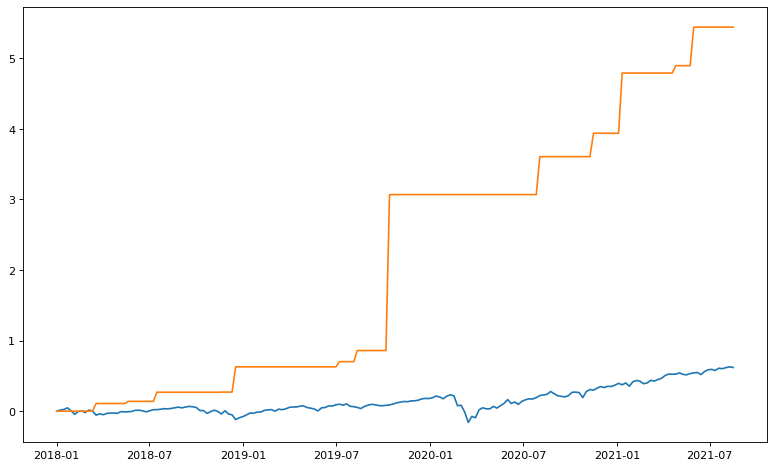

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(12, 7.2), dpi=80)
viz.sort_values("date",inplace=True)
plt.plot(viz["date"],viz["bp"])
plt.plot(viz["date"],viz["pp"])
plt.show()

In [30]:
# industry check
benchmark.groupby(["year","quarter","GICS Sector"]).mean().sort_values("delta",ascending=False).reset_index()[["year","quarter","GICS Sector","delta"]].head(10)

,year,quarter,GICS Sector,delta
0,2020,2,Industrials,0.322186
1,2020,2,Consumer Discretionary,0.305401
2,2020,1,Energy,0.255318
3,2019,4,Materials,0.221441
4,2020,3,Consumer Discretionary,0.149944
5,2019,1,Consumer Staples,0.149060
6,2020,1,Health Care,0.133201
7,2021,3,Consumer Discretionary,0.121632
8,2018,1,Consumer Discretionary,0.113768
9,2019,4,Communication Services,0.112061


In [31]:
benchmark.sort_values("delta",ascending=False).head(20)[["year","quarter","ticker","adjClose","sell_price","delta","Security","date","sell_date"]]

,year,quarter,ticker,adjClose,sell_price,delta,Security,date,sell_date
227,2020,2,CCL,12.820000,24.910000,0.943058,Carnival Corporation,2020-05-06,2020-06-08
226,2020,2,DAL,21.000000,34.160000,0.626667,Delta Air Lines,2020-05-06,2020-06-05
225,2020,2,RCL,36.110000,58.110000,0.609250,Royal Caribbean Group,2020-05-06,2020-06-03
215,2020,1,DVN,6.552760,10.049969,0.533700,Devon Energy,2020-03-12,2020-05-01
216,2020,1,NOV,8.700000,12.330000,0.417241,Nov,2020-03-12,2020-05-04
258,2020,3,ENPH,66.155000,90.430000,0.366941,Enphase Energy,2020-09-04,2020-10-02
251,2020,3,NCLH,13.380000,17.690000,0.322123,Norwegian Cruise Line Holdings,2020-07-27,2020-08-28
223,2020,2,LUV,24.930000,32.550000,0.305656,Southwest Airlines,2020-05-06,2020-05-28
222,2020,2,UAL,22.910000,29.540000,0.289393,United Airlines,2020-05-06,2020-05-26
314,2021,2,NOV,13.320000,17.160000,0.288288,Nov,2021-04-19,2021-05-10
